In [192]:
#drop churn_risk/tenure
# do not use S3_Recode/churn_risk in modeling
# use churn risk/S3_recode for present
# convert some to numbers for certain models to work
# tree structure being robust/boosting/random forest

# gender split/country/favoriate channels/cables&tele?
# drop community/city/original tenure/orginal salutation/all julian dates

# try different metrics -> better than random
# for each kind of labels, how the respondents within the label look like?

# model -> how good can we do than random?
# presentation -> 

In [ ]:
# accuracy per segment
# what problem is
# reduce churn
# data manipulation/data matrix - quickly go over
# gender split/demographics/S3 Recode for churn/ - visualization
# preferences for each segment - visualization/tell story
# do better than randomness per segment

# next step? survey a bit more to new customers/test the db 
# reasons why we use segmentation: we don't talk to every single person enough; 
# so clustering people together to find some similarities -> target people without too much information

In [662]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

df = pd.read_excel('probability_matrix_Partition Around Medoids_6.xlsx')
#df = pd.read_excel('probability_matrix_K-Means_R40_6.xlsx')
#df = pd.read_excel('probability_matrix_K-Means_R18_6.xlsx')
data = pd.read_excel('Cleaned_MaxDiff_Model_Data.xlsx')

In [663]:
df[df['Respondent']==3]
df[df['Respondent']==104]
df[df['Respondent']==1577]

,Respondent,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,cluster


In [664]:
df.groupby('cluster')['Respondent'].count()

cluster
1    1414
2     306
3     368
4     204
5     201
6     173
Name: Respondent, dtype: int64

In [665]:
Respondent_list = []
for i in range(1,2670):
    Respondent_list.append(i)

In [666]:
data['Respondent']=Respondent_list

In [667]:
respondent_ids_to_drop = [3, 104, 1577]

data = data[~data['Respondent'].isin(respondent_ids_to_drop)]

In [668]:
data[data['Respondent']==3]
data[data['Respondent']==104]
data[data['Respondent']==1577]

,Respondent,S3_Recode,Churn_risk,CommercialProductName,ConvergedStatus,DTV_TIER_OPTION_NAME,Film1,FixedVoicePlan,FoxSportEDL,FoxSportINT,...,TELEPHONY_TIER_OPTION_NAME,TVContentPack,Sport,Trimmed_Tenure,New_Salutation,PROVINCE,MDiff_CATV_INSTALLATION_DATE,MDiff_DTV_INSTALLATION_DATE,MDiff_INTERNET_INSTALLATION_DATE,MDiff_TELEPHONY_INSTALLATION_DATE


Manually figured out and changed the values of “provinces not found” in Provinces.

In [669]:
data.loc[data['PROVINCE'] == 'Frysl??n','PROVINCE'] = 'Friesland'
grouped = data.groupby(['PROVINCE'])
count_per_name = grouped.size()
print(count_per_name)

PROVINCE
Drenthe           99
Flevoland         24
Fryslân           96
Gelderland       301
Groningen         92
Limburg          331
Noord-Brabant    488
Noord-Holland    442
Overijssel       158
Utrecht          171
Zuid-Holland     464
dtype: int64


In [670]:
data.loc[data['S3_Recode'] == 'LOYAL & LIGHT RISK','S3_Recode'] = 'LIGHT RISK'
grouped = data.groupby(['S3_Recode'])
count_per_name = grouped.size()
print(count_per_name)

S3_Recode
HIGH RISK      1315
LIGHT RISK      351
MEDIUM RISK    1000
dtype: int64


In [671]:
data.loc[data['ConvergedStatus'] == 'Converged','ConvergedStatus'] = '1'
data.loc[data['ConvergedStatus'] == 'Not Converged','ConvergedStatus'] = '0'
grouped = data.groupby(['ConvergedStatus'])
count_per_name = grouped.size()
print(count_per_name)

ConvergedStatus
0    1430
1    1236
dtype: int64


In [672]:
data.loc[data['New_Salutation'] == 'Unknown','New_Salutation'] = 'Mr./Ms.'
grouped = data.groupby(['New_Salutation'])
count_per_name = grouped.size()
print(count_per_name)

New_Salutation
Mr.        1990
Mr./Ms.      84
Ms.         592
dtype: int64


In [673]:
data[['S3_Recode','Churn_risk','DTV_TIER_OPTION_NAME','CommercialProductName',
      'INTERNET_TIER_OPTION_NAME','InternetSecurityType','MediaBoxType','TVContentPack',
      'PlayLevel','TELEPHONY_TIER_OPTION_NAME','FixedVoicePlan']]

,S3_Recode,Churn_risk,DTV_TIER_OPTION_NAME,CommercialProductName,INTERNET_TIER_OPTION_NAME,InternetSecurityType,MediaBoxType,TVContentPack,PlayLevel,TELEPHONY_TIER_OPTION_NAME,FixedVoicePlan
0,MEDIUM RISK,high,Extra Channel Pack No Horizon,Internet Complete & TV Start (2P),250 / 25 MBPS,SAFE ONLINE,MEDIABOX,Extra Channel Pack,TV + INT,0,0
1,MEDIUM RISK,mid,Extra Channel Pack Horizon,Internet Complete & TV Max (2P),250 / 25 MBPS,SAFE ONLINE,MEDIABOX XL,Extra Channel Pack,TV + INT,0,0
3,LIGHT RISK,high,Standard Channel Pack No Horizon,Internet Start & TV Start (2P),50 / 5 MBPS,SAFE ONLINE XL,MEDIABOX,Standard Channel Pack,TV + INT,0,0
4,LIGHT RISK,low,Standard Channel Pack No Horizon,Internet Complete & TV Start,250 / 25 MBPS,SAFE ONLINE XL,0,Standard Channel Pack,TV + INT + TEL,Volop Bellen,Volop Bellen
5,MEDIUM RISK,low,Standard Channel Pack No Horizon,Internet Start & TV Complete Next,50 / 5 MBPS,SAFE ONLINE XL,MEDIABOX NEXT,Standard Channel Pack,TV + INT + TEL,Vast Bellen,Vast Bellen
...,...,...,...,...,...,...,...,...,...,...,...
2664,LIGHT RISK,high,Extra Channel Pack No Horizon,Internet Complete & TV Start,250 / 25 MBPS,SAFE ONLINE,MEDIABOX,Extra Channel Pack,TV + INT + TEL,Volop Bellen Internationaal,Volop Bellen Internationaal
2665,MEDIUM RISK,low,Standard Channel Pack No Horizon,Internet Start & TV Start,50 / 5 MBPS,SAFE ONLINE XL,MEDIABOX,Standard Channel Pack,TV + INT + TEL,Volop Bellen,Volop Bellen
2666,MEDIUM RISK,low,Standard Channel Pack No Horizon,Internet Complete & TV Complete Next,250 / 25 MBPS,SAFE ONLINE XL,MEDIABOX NEXT,Standard Channel Pack,TV + INT + TEL,Vast Bellen,Vast Bellen
2667,LIGHT RISK,high,Standard Channel Pack Horizon,Internet Start & TV Complete (2P),50 / 5 MBPS,SAFE ONLINE,MEDIABOX XL,Standard Channel Pack,TV + INT,0,0


In [674]:
data=data.drop(['Respondent','S3_Recode','Churn_risk','DTV_TIER_OPTION_NAME','CommercialProductName',
      'INTERNET_TIER_OPTION_NAME','InternetSecurityType','MediaBoxType','TVContentPack',
      'PlayLevel','TELEPHONY_TIER_OPTION_NAME','FixedVoicePlan'], axis=1)

In [675]:
data

,ConvergedStatus,Film1,FoxSportEDL,FoxSportINT,HasCATV,HasDTV,HasINT,HasTEL,IntSecurity_Benefit,Kids_Benefit,...,MoviesSeriesXL,MSL_Benefit,Sport,Trimmed_Tenure,New_Salutation,PROVINCE,MDiff_CATV_INSTALLATION_DATE,MDiff_DTV_INSTALLATION_DATE,MDiff_INTERNET_INSTALLATION_DATE,MDiff_TELEPHONY_INSTALLATION_DATE
0,0,0,0,0,1,1,1,0,0,0,...,1,0,0,0.789,Mr.,Utrecht,42,43,43,1488
1,0,0,0,0,1,1,1,0,0,0,...,1,0,0,7.210,Ms.,Noord-Brabant,120,120,120,120
3,1,0,0,0,1,1,1,0,1,0,...,0,1,0,2.846,Mr.,Limburg,67,68,68,1488
4,1,0,0,0,1,1,1,1,1,0,...,0,1,0,4.369,Mr.,Limburg,86,86,86,86
5,1,0,1,0,1,1,1,1,1,0,...,0,0,1,6.517,Mr.,Limburg,112,112,112,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664,0,0,0,0,1,1,1,1,0,0,...,1,0,0,4.356,Mr./Ms.,Gelderland,86,86,86,86
2665,1,0,0,0,1,1,1,1,1,0,...,0,1,0,1.117,Mr.,Noord-Brabant,167,167,167,167
2666,1,0,0,0,1,1,1,1,1,0,...,0,0,1,1.103,Mr.,Limburg,166,166,166,166
2667,0,0,0,0,1,1,1,0,0,0,...,0,0,0,4.621,Mr.,Noord-Brabant,89,88,88,1488


In [676]:
data.columns

Index(['ConvergedStatus', 'Film1', 'FoxSportEDL', 'FoxSportINT', 'HasCATV',
       'HasDTV', 'HasINT', 'HasTEL', 'IntSecurity_Benefit', 'Kids_Benefit',
       'MoviesSeriesL', 'MoviesSeriesStd', 'MoviesSeriesXL', 'MSL_Benefit',
       'Sport', 'Trimmed_Tenure', 'New_Salutation', 'PROVINCE',
       'MDiff_CATV_INSTALLATION_DATE', 'MDiff_DTV_INSTALLATION_DATE',
       'MDiff_INTERNET_INSTALLATION_DATE',
       'MDiff_TELEPHONY_INSTALLATION_DATE'],
      dtype='object')

In [677]:
df = df['cluster']

In [678]:
df

0       5
1       1
2       4
3       1
4       1
       ..
2661    3
2662    1
2663    1
2664    5
2665    1
Name: cluster, Length: 2666, dtype: int64

In [679]:
data.isna().sum(axis=1).sum()

5

In [680]:
data[data.isna().any(axis=1)]['Trimmed_Tenure']

276    NaN
1320   NaN
1544   NaN
2101   NaN
2316   NaN
Name: Trimmed_Tenure, dtype: float64

In [681]:
data['Trimmed_Tenure'] = data['Trimmed_Tenure'].fillna(0)

In [682]:
data[data.isna().any(axis=1)]['Trimmed_Tenure']

Series([], Name: Trimmed_Tenure, dtype: float64)

In [683]:
data.isna().sum(axis=1).sum()

0

In [684]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from xgboost import XGBClassifier
import warnings

In [685]:
#LabelEncoder
label = data.select_dtypes(include=['object', 'category']).columns
label_encoders = {}
for col in label:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [686]:
data.shape

(2666, 22)

In [687]:
# RandomForestClassifier
X = data # All Features
y = df # Cluster ID

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=1000,random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [688]:
from sklearn.metrics import precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
print("Metrics using PAM 6")
print("Accuracy: " + "{:.3f}".format(accuracy) + "  Precision: " + "{:.3f}".format(precision))
print("Recall: " + "{:.3f}".format(recall) + "    F1: " + "{:.3f}".format(f1))

Metrics using PAM 6
Accuracy: 0.465  Precision: 0.341
Recall: 0.465    F1: 0.380


In [689]:
print("The accuracy with data using PAM 6 algorithm is " + str(accuracy))

The accuracy with data using PAM 6 algorithm is 0.465


In [690]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm) 

Confusion matrix

 [[354  17  25  15   9   8]
 [ 76   4   9   4   0   2]
 [ 94   4   8   3   1   0]
 [ 59   4   2   4   0   1]
 [ 45   1   6   0   0   3]
 [ 33   2   5   0   0   2]]


In [691]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.54      0.83      0.65       428
           2       0.12      0.04      0.06        95
           3       0.15      0.07      0.10       110
           4       0.15      0.06      0.08        70
           5       0.00      0.00      0.00        55
           6       0.12      0.05      0.07        42

    accuracy                           0.47       800
   macro avg       0.18      0.17      0.16       800
weighted avg       0.34      0.47      0.38       800



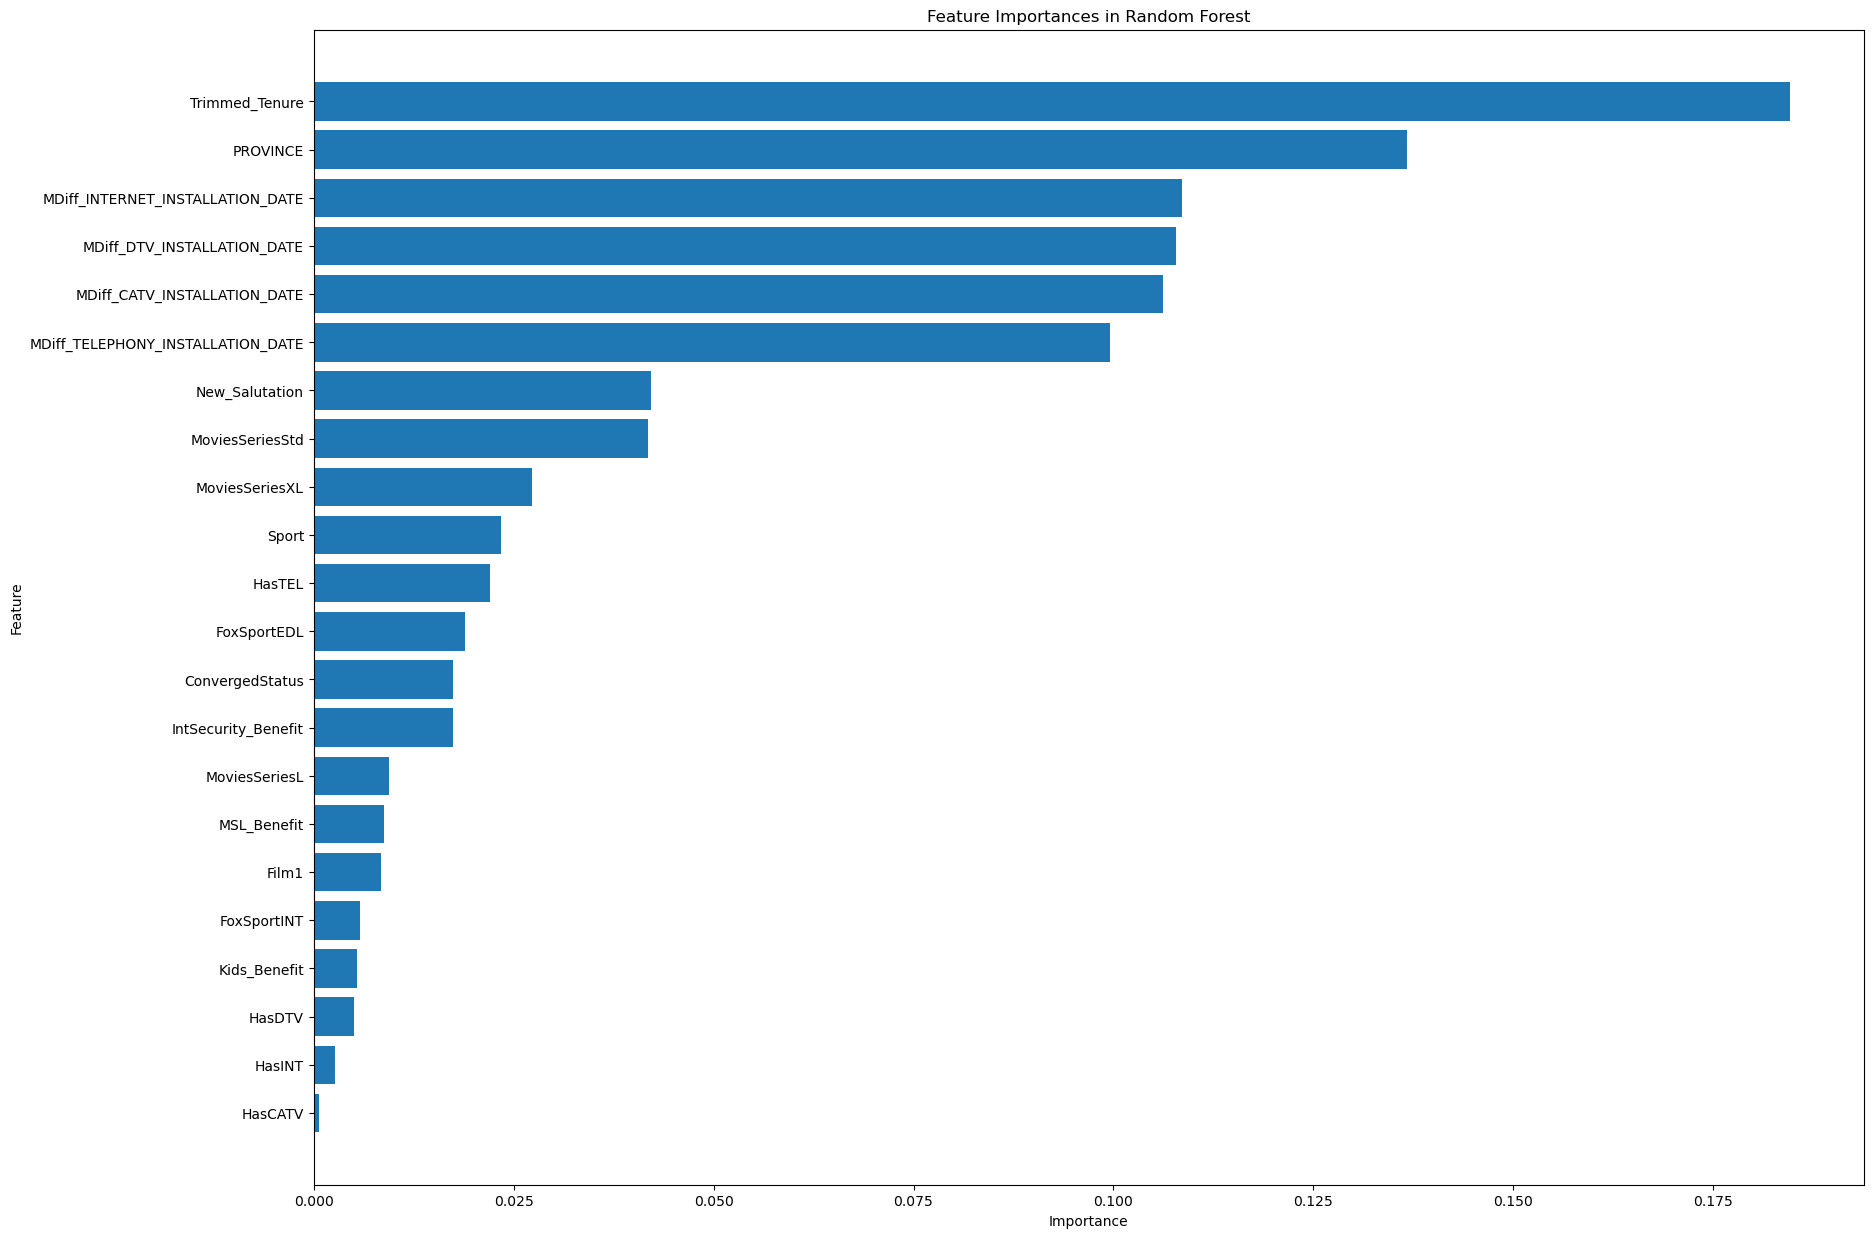

In [692]:
#feature_importances
feature_importances = rf.feature_importances_
features = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features= features.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 15))  
plt.barh(features['Feature'], features['Importance'])  
plt.xlabel('Importance')  
plt.ylabel('Feature')  
plt.title('Feature Importances in Random Forest')  
plt.gca().invert_yaxis()  
plt.show() # drop the last five to see if improving better

In [693]:
# top16 RandomForestClassifier
#features=features.head(17) 
top_features = features.head(15)['Feature'].values
#top_features = features['Feature'].values
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

rf_top = RandomForestClassifier(n_estimators=100,random_state=42)
rf_top.fit(X_train_top, y_train)

y_pred_top = rf_top.predict(X_test_top)
accuracy_top = accuracy_score(y_test, y_pred_top)


accuracy_top

0.46

In [511]:
features_val = features['Feature'].values

In [ ]:
warnings.filterwarnings("ignore")

features_val = features['Feature'].values
accuracies = []

for num_features in range(1, len(features_val) + 1):
    current_features = features_val[:num_features]
    X_train_top = X_train[current_features]
    X_test_top = X_test[current_features]

    rf_top = RandomForestClassifier(n_estimators=1000, random_state=42)
    rf_top.fit(X_train_top, y_train)

    y_pred_top = rf_top.predict(X_test_top)
    accuracy_top = accuracy_score(y_test, y_pred_top)
    accuracies.append(accuracy_top)

# Plotting the results
plt.plot(range(1, len(features_val) + 1), accuracies, marker='o')
# Adding axis labels
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Random Forest using PAM 6')
#plt.xlabel

In [695]:
features

,Feature,Importance
15,Trimmed_Tenure,0.184607
17,PROVINCE,0.136683
20,MDiff_INTERNET_INSTALLATION_DATE,0.108532
19,MDiff_DTV_INSTALLATION_DATE,0.107839
18,MDiff_CATV_INSTALLATION_DATE,0.106209
21,MDiff_TELEPHONY_INSTALLATION_DATE,0.099566
16,New_Salutation,0.042128
11,MoviesSeriesStd,0.041742
12,MoviesSeriesXL,0.027308
14,Sport,0.023359


In [697]:
#LabelEncoder
label = data.select_dtypes(include=['object', 'category']).columns
label_encoders = {}
for col in label:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
data.shape

(2666, 22)

In [698]:
# XGBOOST
X = data
y = df-1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


xgb_model = XGBClassifier(n_estimators=1000, random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

accuracy

0.395

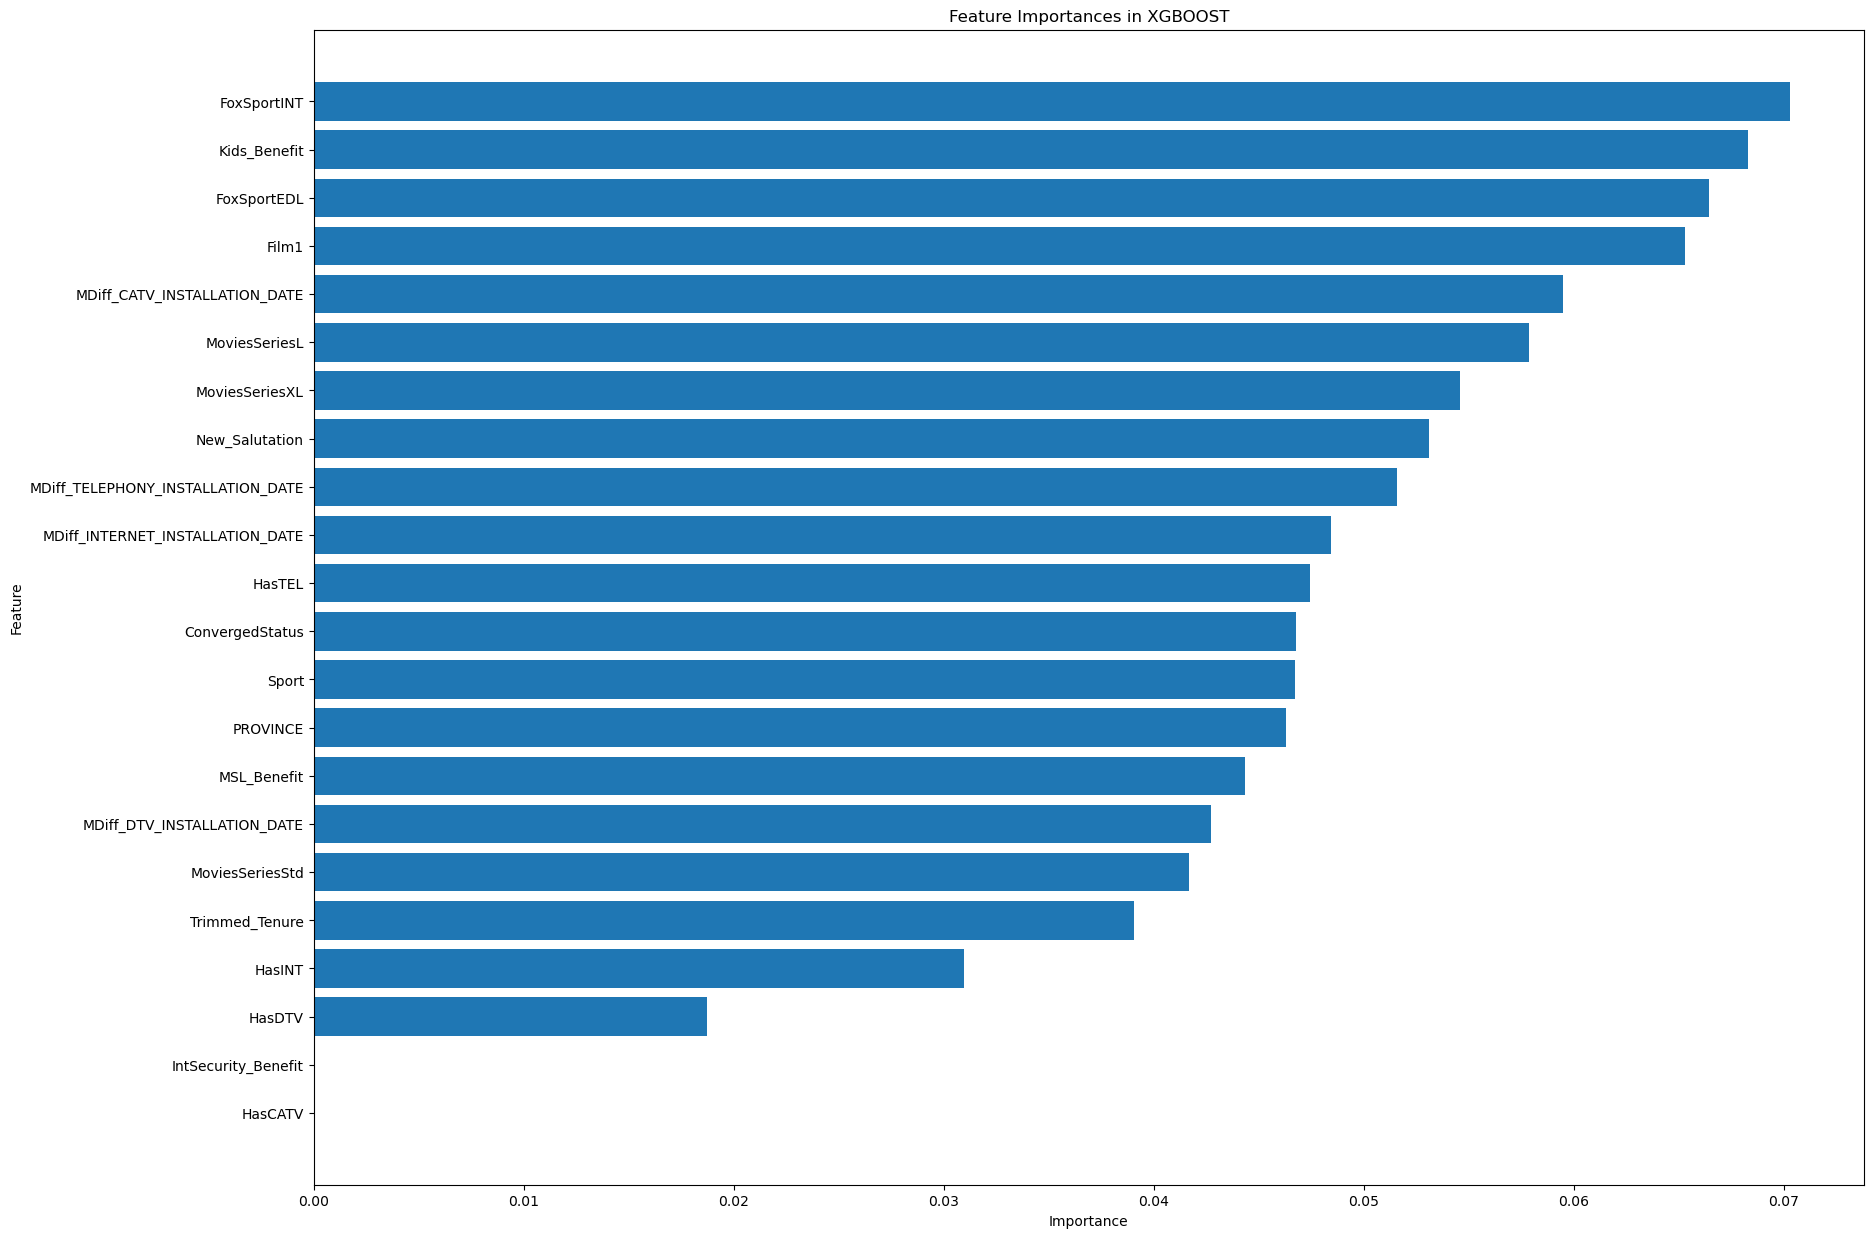

In [699]:
feature_importances = xgb_model.feature_importances_

features = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features= features.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 15))  
plt.barh(features['Feature'], features['Importance'])  
plt.xlabel('Importance')  
plt.ylabel('Feature')  
plt.title('Feature Importances in XGBOOST')  
plt.gca().invert_yaxis()  
plt.show()


In [659]:
# XGBOOST top
#features=features.head(10) 
top_features = features.head(10)['Feature'].values
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

xgb_top = XGBClassifier(n_estimators=100,random_state=42)
xgb_top.fit(X_train_top, y_train)

y_pred_top = xgb_top.predict(X_test_top)
accuracy_top = accuracy_score(y_test, y_pred_top)


accuracy_top

0.47125

In [700]:
features_val = features['Feature'].values
accuracies = []

for num_features in range(1, len(features_val) + 1):
    current_features = features_val[:num_features]
    X_train_top = X_train[current_features]
    X_test_top = X_test[current_features]

    xgb_top = XGBClassifier(n_estimators=100, random_state=42)
    xgb_top.fit(X_train_top, y_train)

    y_pred_top = xgb_top.predict(X_test_top)
    accuracy_top = accuracy_score(y_test, y_pred_top)
    accuracies.append(accuracy_top)

# Plotting the results
plt.plot(range(1, len(features_val) + 1), accuracies, marker='o')
# Adding axis labels
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('XG Boost using PAM 6')
#plt.xlabel

KeyboardInterrupt: 

In [658]:
from sklearn.metrics import roc_curve, auc
(fpr, tpr, thresholds) = roc_curve(y_test,y_pred)

area = auc(fpr,tpr)
plt.clf() 
plt.plot(fpr,tpr,label="ROC Curve with area = %1.2f"%area)

plt.plot([0, 1], [0, 1], 'k') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

ValueError: multiclass format is not supported

In [152]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LogisticRegression(max_iter=10000, random_state=42)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

accuracy

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


0.9275